In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_dwi_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_dwi_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_dwi_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_dwi_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_dwi_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_dwi_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

('Number train images: ', 192)
('Number val images: ', 11)
('Number test images: ', 12)


In [4]:
model_name = 'vgg_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98215531 0.01784469]
[ 1.         55.03908977]
[0.01800582 4.02604948]


('Model output shape', (None, 50176, 2))
('Epoch', 0)
Epoch 1/1
24/24 [==============================] - 589s 25s/step - loss: 0.0235 - acc: 0.7346 - dice: 0.1160 - iou: 0.0620 - val_loss: 0.0248 - val_acc: 0.7058 - val_dice: 0.0468 - val_iou: 0.0240
('Epoch', 1)
Epoch 1/1
24/24 [==============================] - 645s 27s/step - loss: 0.0144 - acc: 0.8005 - dice: 0.1553 - iou: 0.0851 - val_loss: 0.0281 - val_acc: 0.7466 - val_dice: 0.0527 - val_iou: 0.0271
('Epoch', 2)
Epoch 1/1
24/24 [==============================] - 653s 27s/step - loss: 0.0132 - acc: 0.8525 - dice: 0.1947 - iou: 0.1087 - val_loss: 0.0247 - val_acc: 0.8654 - val_dice: 0.0773 - val_iou: 0.0402
('Epoch', 3)
Epoch 1/1
24/24 [==============================] - 652s 27s/step - loss: 0.0118 - acc: 0.8944 - dice: 0.2542 - iou: 0.1476 - val_loss: 0.0269 - val_acc: 0.9146 - val_dice: 0.0962 - val_iou: 0.0505
('Epoch', 4)
Epoch 1/1
24/24 [==============================] - 626s 26s/step - loss: 0.0111 - acc: 0.9177 - dice: 0.30

('Epoch', 39)
Epoch 1/1
24/24 [==============================] - 667s 28s/step - loss: 0.0024 - acc: 0.9897 - dice: 0.7695 - iou: 0.6269 - val_loss: 0.0495 - val_acc: 0.9731 - val_dice: 0.1410 - val_iou: 0.0759
('Epoch', 40)
Epoch 1/1
24/24 [==============================] - 630s 26s/step - loss: 0.0023 - acc: 0.9905 - dice: 0.7831 - iou: 0.6451 - val_loss: 0.0513 - val_acc: 0.9743 - val_dice: 0.1413 - val_iou: 0.0760
('Epoch', 41)
Epoch 1/1
24/24 [==============================] - 645s 27s/step - loss: 0.0022 - acc: 0.9912 - dice: 0.7951 - iou: 0.6612 - val_loss: 0.0535 - val_acc: 0.9748 - val_dice: 0.1374 - val_iou: 0.0738
('Epoch', 42)
Epoch 1/1
24/24 [==============================] - 626s 26s/step - loss: 0.0021 - acc: 0.9915 - dice: 0.8017 - iou: 0.6702 - val_loss: 0.0572 - val_acc: 0.9774 - val_dice: 0.1313 - val_iou: 0.0702
('Epoch', 43)
Epoch 1/1
24/24 [==============================] - 664s 28s/step - loss: 0.0020 - acc: 0.9921 - dice: 0.8121 - iou: 0.6847 - val_loss: 0.0560 

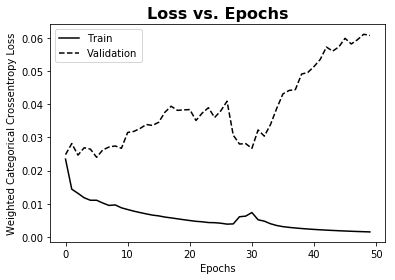

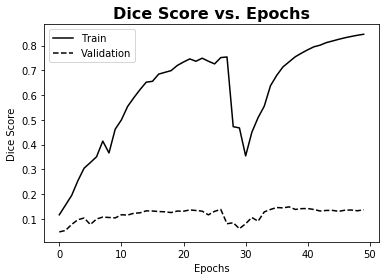

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

('Total training time: ', 32305.476943969727)


In [6]:
epochs = 26

In [7]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   9461880
           1       0.58      1.00      0.73    171912

   micro avg       0.99      0.99      0.99   9633792
   macro avg       0.79      0.99      0.86   9633792
weighted avg       0.99      0.99      0.99   9633792

('F1/dice (binary): ', 0.7305446164146103)
('Jaccard/IOU: ', 0.5754787650364638)


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [9]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    547881
           1       0.06      0.32      0.10      4055

   micro avg       0.96      0.96      0.96    551936
   macro avg       0.53      0.64      0.54    551936
weighted avg       0.99      0.96      0.97    551936

('F1/dice (binary): ', 0.09961219679111855)
('Jaccard/IOU: ', 0.05241677336747759)


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [11]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    586517
           1       0.28      0.66      0.39     15595

   micro avg       0.95      0.95      0.95    602112
   macro avg       0.64      0.81      0.68    602112
weighted avg       0.97      0.95      0.96    602112

('F1/dice (binary): ', 0.3939324817518248)
('Jaccard/IOU: ', 0.24527765942337737)


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)